# Assignment: Perform SVM with PCA operation on Iris Dataset.

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import svm,decomposition
import matplotlib.pyplot as plt
import numpy as np 

iris_dataset = datasets.load_iris()
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/jovyan/scikit_learn_data


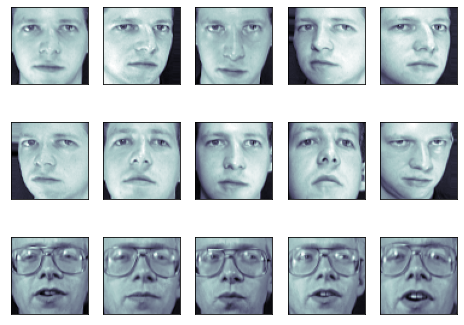

In [4]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data,iris_dataset.target, random_state=12)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [6]:
pca = decomposition.PCA(n_components=3, whiten=True, random_state=3)
pca.fit(X_train)

PCA(n_components=3, random_state=3, whiten=True)

In [8]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

clf = svm.SVC(C=3., gamma=0.005, random_state=3)
clf.fit(X_train_pca, y_train)

(112, 3)


SVC(C=3.0, gamma=0.005, random_state=3)

In [9]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.89        38
   macro avg       0.88      0.88      0.88        38
weighted avg       0.89      0.89      0.89        38



In [10]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=3, whiten=True)), ('svm', svm.LinearSVC(C=3.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[14  0  0]
 [ 1 11  0]
 [ 0  1 11]]
